In [ ]:
# Comparing machine learning models.
"""
1. Logistic regression
2. K-nearest neighbour
3. Support Vector Machine
4. Naive Bayes 
5. Decision trees
6. Random Forest
"""       
# Confusion Matrix.

In [1]:
# Import libraries
import numpy as np      # linear algebra
import pandas as pd     # data preparation and pre-processing
import matplotlib.pyplot as plt     # plotting
import seaborn as sns       # statistical data visualization
import graphviz    # visualizing the leaf node
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Control display
pd.options.display.max_columns = 50
sns.set(style="darkgrid", rc={'axes.facecolor': '#CAF1DE'})

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('heart_disease.csv')
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [3]:
# cp = chest pain
# chol = cholesterol
# fbs = fasting blood sugar
# restecg = resting electrocardiography
# exang = exercise induced agina
# oldpeak = ST depression induced
# slope = slope of the peak exercise
# ca = number of major vessel
# thal = normal, fexied defect, reversible defect
# target = have disease or not (1-yes, 0-no)

In [4]:
# Show people with heart disease.
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
# Show percentage of male and female patients
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
print('Percentage of female patients: {:.2f}%' .format(count_female/(len(df.sex))*100))
print('Percentage of male patients: {:.2f}%' .format(count_male/(len(df.sex))*100))

Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [6]:
# Get the mean for the training data.
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


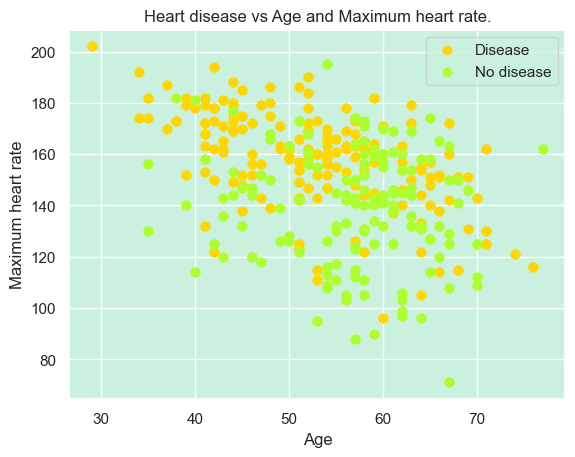

In [7]:
# Scatter plot 
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c='#FFD700', label= 'Disease')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c='#ADFF2F', label= 'No disease')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
plt.title('Heart disease vs Age and Maximum heart rate.')
plt.show()

In [8]:
# Create the independent and dependent variables.
y = df.target.values
x_data = df.drop(['target'], axis= 1)

In [9]:
# Normalize the data.
x = (x_data - np.min(x_data)) / (np.max(x_data)) - (np.min(x_data))

In [10]:
# Splitting into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

In [11]:
# Check the shape of data after splitting. 
X_train.shape , X_test.shape

((768, 13), (257, 13))

In [12]:
# Transpose matrices
X_train = X_train.T 
y_train = y_train.T 
X_test = X_test.T 
y_test = y_test.T 

**LOGISTIC REGRESSION ALGORITHM.**

In [13]:
# Instantiate the model
lr = LogisticRegression()
lr.fit(X_train.T, y_train.T)
acc = lr.score(X_test.T, y_test.T) * 100

# Getting the accuracy
accuracies = {}
accuracies['LogisticRegression'] = acc 
print('Logistic Regression Accuracy: {:.2f} %'.format(acc))

Logistic Regression Accuracy: 71.60 %


**KNN CLASSIFIER.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train.T, y_train.T)
prediction = knn.predict(X_test.T)

print('{}NN accuracy score: {:.2f} %'.format(2, knn.score(X_test.T, y_test.T) * 100))

2NN accuracy score: 93.77 %


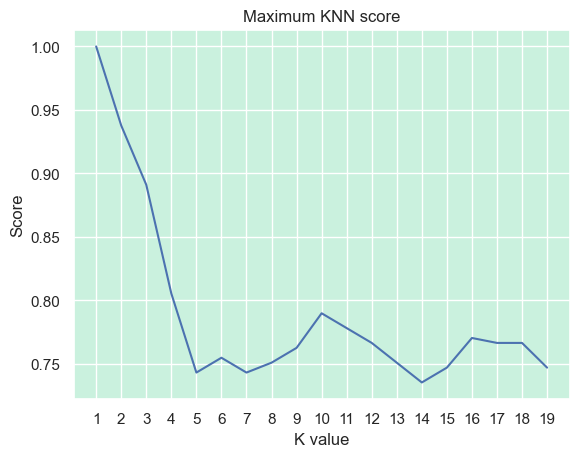

Maximum KNN score: 100 %


In [15]:
# Maximum KNN score for the model.
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(X_train.T, y_train.T)
    score_list.append(knn2.score(X_test.T, y_test.T))

# Show using line plot.
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN score: {:.0f} %'.format(acc))

**SUPPORT VECTOR MACHINE.**

In [16]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train.T, y_train.T)
acc = svm.score(X_test.T, y_test.T) * 100
accuracies['SVM'] = acc
print('Accuracy of SVM: {:.2f} %'.format(acc))

Accuracy of SVM: 75.10 %


**NAIVE BAYES ALGORITHM.**

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train.T, y_train.T)
acc = nb.score(X_test.T, y_test.T) * 100
accuracies['Naive Bayes'] = acc
print('Naive Bayes accuracy: {:.2f} %'.format(acc))


Naive Bayes accuracy: 84.44 %


**DECISION TREES.**

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train.T, y_train.T)
acc = dtc.score(X_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc
print('Accuracy for the Decision Tree Algorithm: {:.0f} %'.format(acc))

Accuracy for the Decision Tree Algorithm: 100 %


**RANDOM FOREST ALGORITHM.**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train.T, y_train.T)
acc = rf.score(X_test.T, y_test.T) * 100
accuracies['Random Forest'] = acc
print('Accuracy for the Random Forest Algorithm: {:.0f} %'.format(acc))

Accuracy for the Random Forest Algorithm: 100 %


***COMPARE MODEL ACCURACY USING A BARPLOT.***

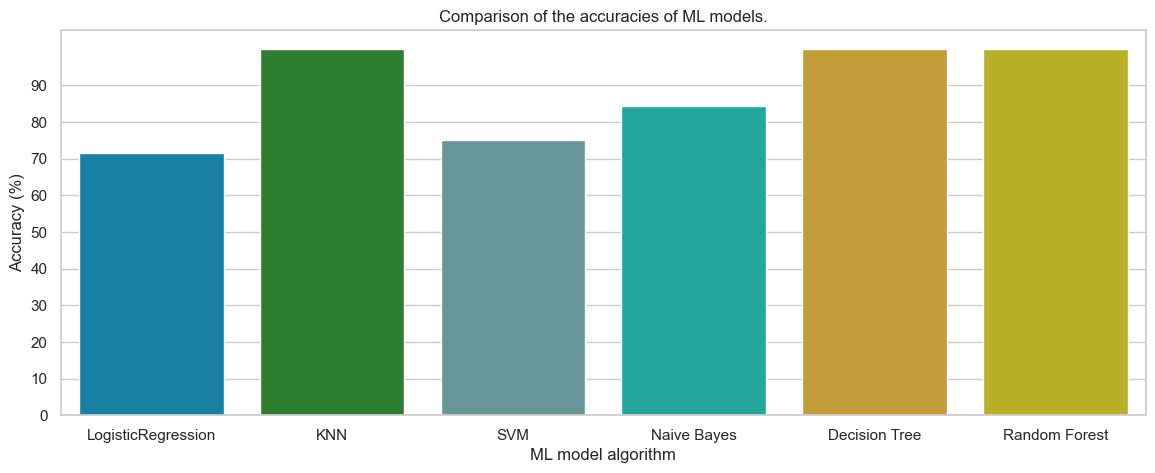

In [20]:
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E'] 

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title('Comparison of the accuracies of ML models.')
plt.ylabel('Accuracy (%)')
plt.xlabel('ML model algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

**CONFUSION MATRIX.**

In [ ]:
# Evaluate the performance of a classification model.
"""
True Positive (TP): The number of instances correctly predicted as positive 
True Negative (TN): The number of instances correctly predicted as negative
False Positive (FP): The number of instances incorrectly predicted as positive
False Negative (FP): The number of instances incorrectly predicted as negative
"""

In [22]:
# predicted values.
y_head_lr = lr.predict(X_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train.T, y_train.T)
y_head_knn = knn3.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rf = rf.predict(X_test.T)

In [23]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_knn = confusion_matrix(y_test, y_head_knn)

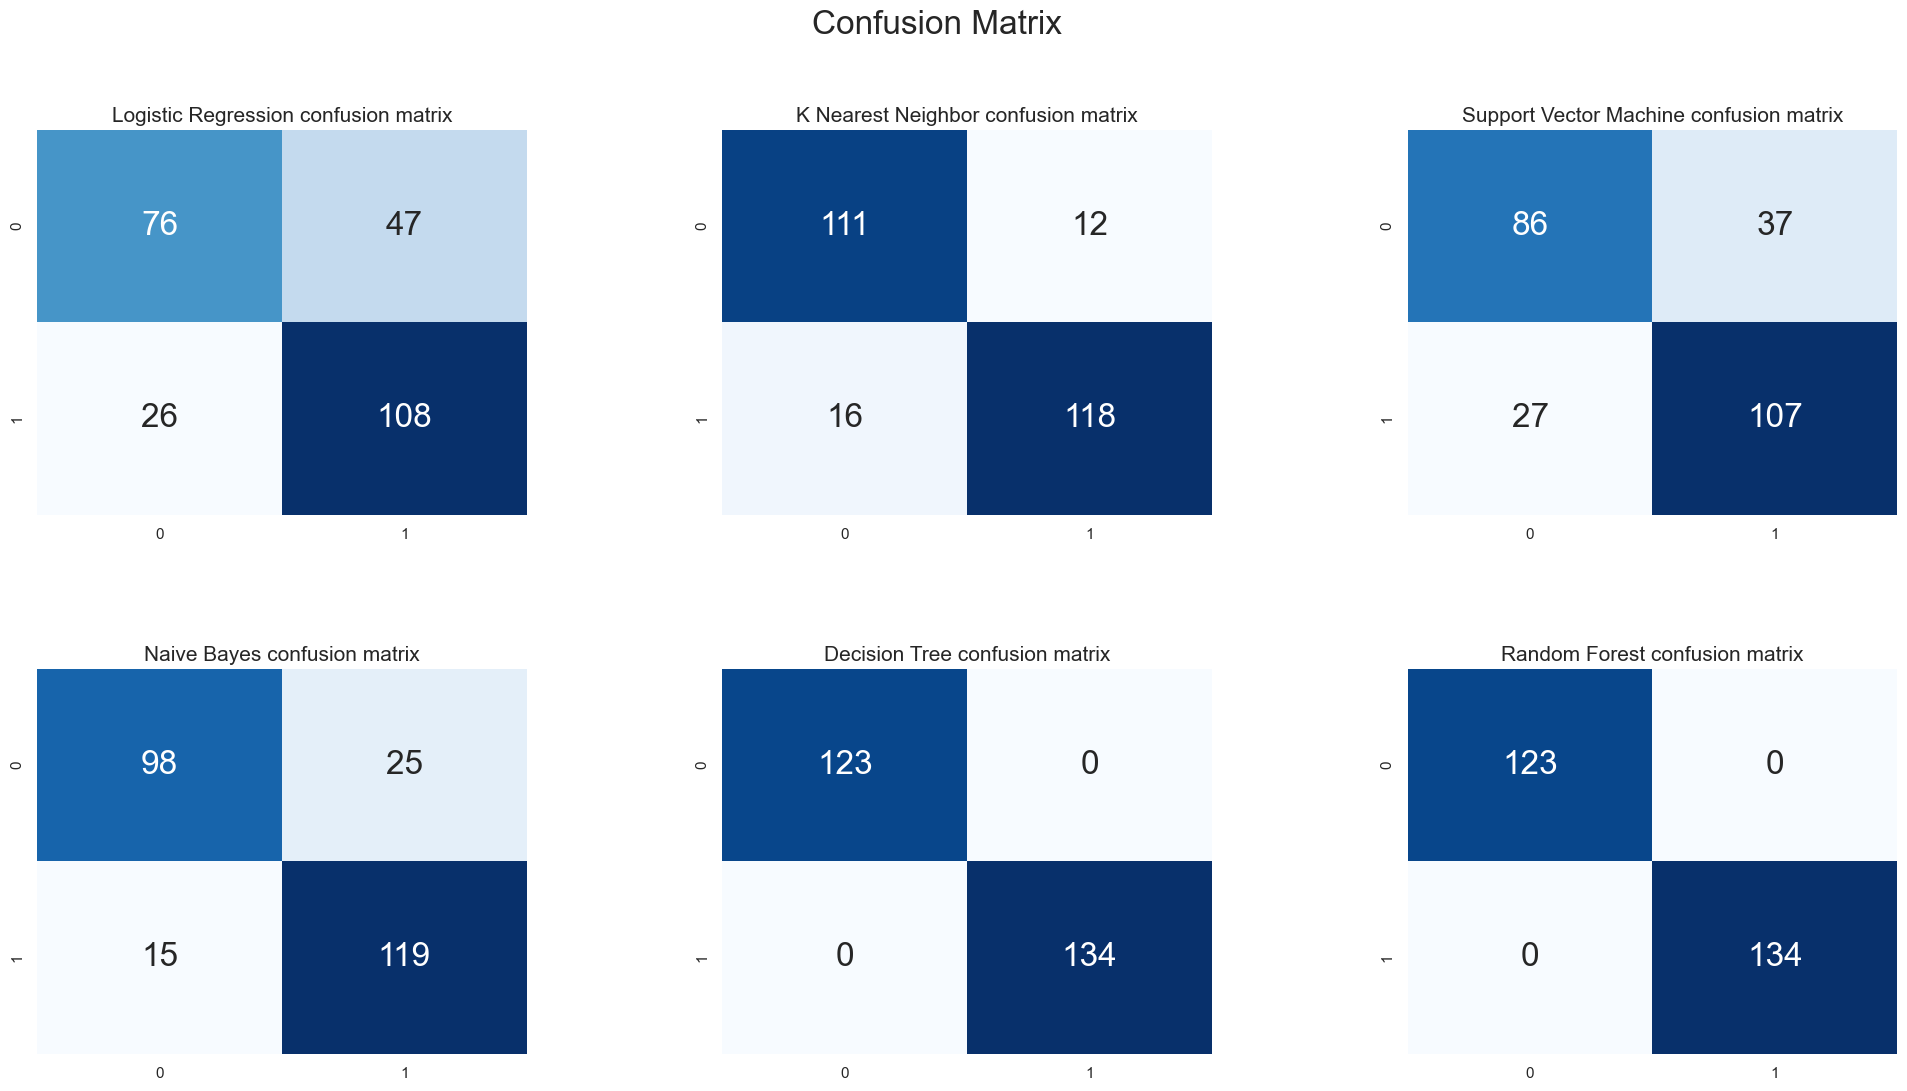

In [24]:
# Plot confusion matrix using heatmap 
plt.figure(figsize=(24,12))
plt.suptitle('Confusion Matrix', fontsize= 24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2,3,1)
plt.title('Logistic Regression confusion matrix', fontsize=15)
# Logisitc Regression heatmap
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.subplot(2,3,2)
plt.title('K Nearest Neighbor confusion matrix', fontsize=15)
# K Nearest Neighbor heatmap
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.subplot(2,3,3)
plt.title('Support Vector Machine confusion matrix', fontsize=15)
# Support Vector Machine heatmap
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.subplot(2,3,4)
plt.title('Naive Bayes confusion matrix', fontsize=15)
# Naive Bayes heatmap
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.subplot(2,3,5)
plt.title('Decision Tree confusion matrix', fontsize=15)
# Decision Tree heatmap
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.subplot(2,3,6)
plt.title('Random Forest confusion matrix', fontsize=15)
# Random Forest heatmap
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.show()